In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **Data Importing**

In [4]:
zomato = pd.read_csv("/content/drive/MyDrive/Zomato-data-.csv")
zomato.head(10)


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [37]:
zomato.shape

(148, 7)

In [38]:
zomato.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [5]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [39]:
# converting the data type of the “rate” column to float and removing the denominator.
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

zomato['rate']=zomato['rate'].apply(handleRate)
zomato.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


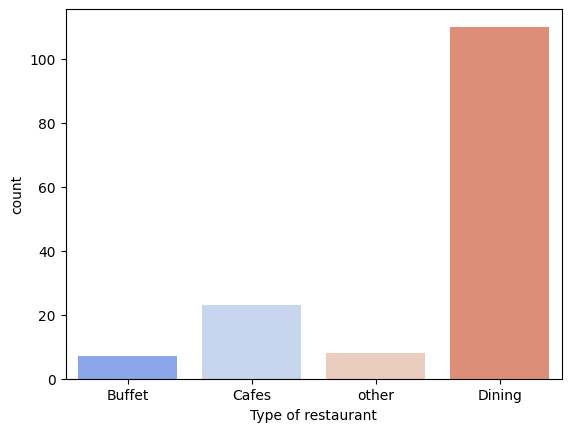

In [13]:
sns.countplot(x=zomato['listed_in(type)'], palette="coolwarm", hue=zomato['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.show()

**Conclusion: The majority of the restaurants fall into the dining category.**

Text(0, 0.5, 'Votes')

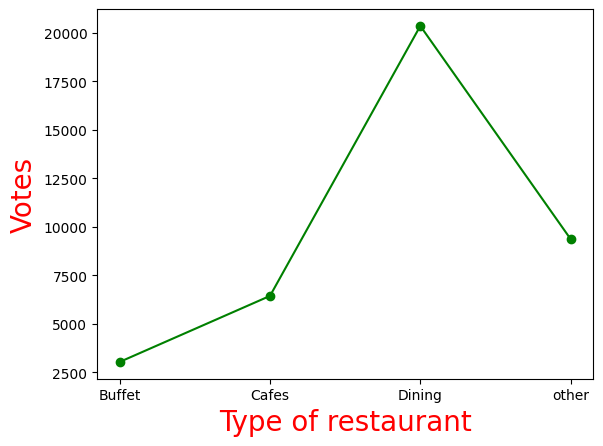

In [15]:
votes_per_category = zomato.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': votes_per_category})
plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='red', size=20)
plt.ylabel('Votes', c='red', size=20)

**Conclusion: Dining restaurants are preferred by a larger number of individuals.**

In [18]:
max_votes =  zomato['votes'].max()
restaurant_with_max_votes = zomato.loc[zomato['votes'] == max_votes, 'name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


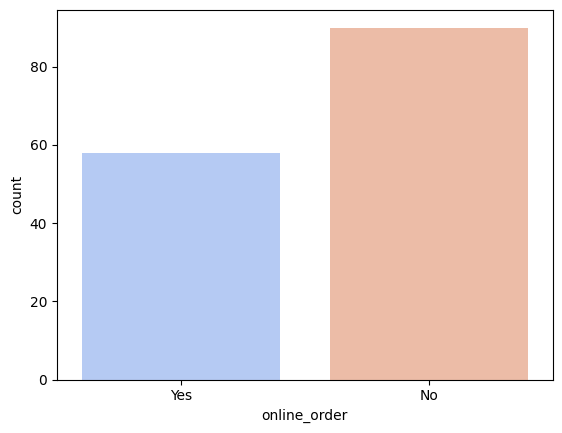

In [21]:
sns.countplot(x=zomato['online_order'],palette="coolwarm", hue=zomato['online_order'])
plt.show()


**Conclusion: This suggests that a majority of the restaurants do not accept online orders.**

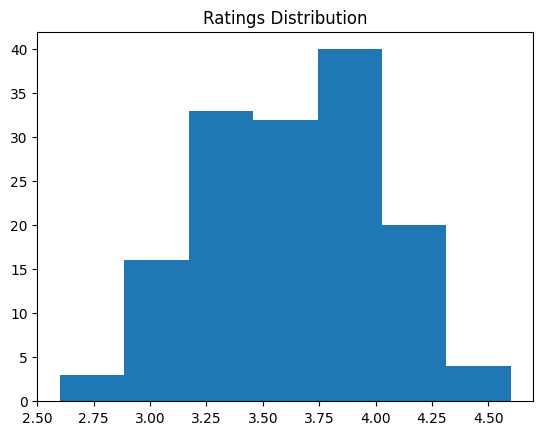

In [25]:
plt.hist(zomato['rate'],bins=7)
plt.title('Ratings Distribution')
plt.show()


**Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.**

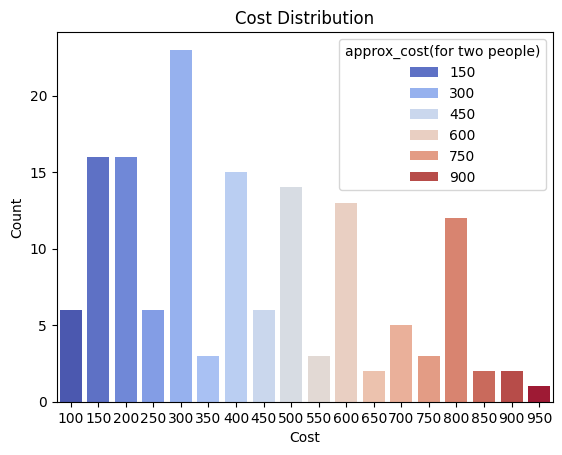

In [29]:
couple_data=zomato['approx_cost(for two people)']
sns.countplot(x=couple_data,palette="coolwarm", hue=zomato['approx_cost(for two people)'])
plt.title('Cost Distribution')
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

**Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.**

<ipython-input-34-b30f685c7581>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'online_order', y = 'rate', data = zomato, palette = 'coolwarm')


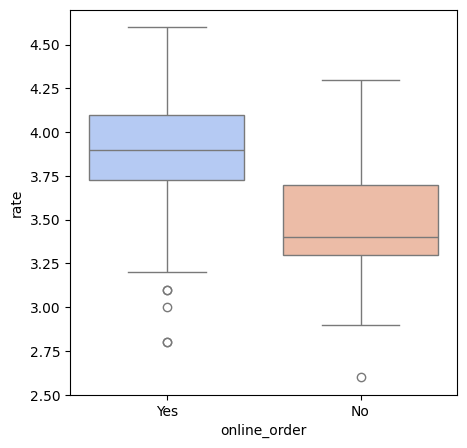

In [34]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'online_order', y = 'rate', data = zomato, palette = 'coolwarm')
plt.show()


**CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.**

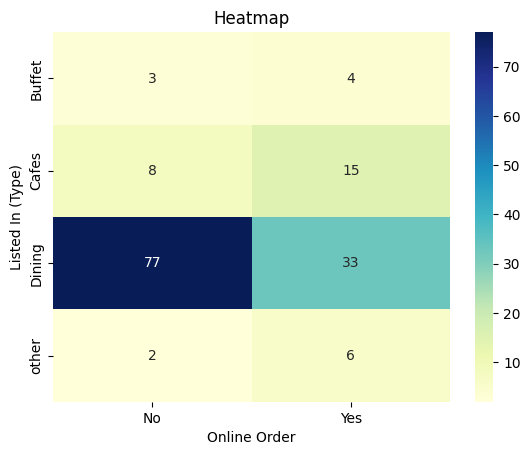

In [36]:
pivot_table = zomato.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()


**CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.**